<a href="https://colab.research.google.com/github/AdityaKumbhar21/Machine_Learning/blob/main/Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Dividing it in X and y

X = df.drop('Profit', axis = 1)
y = df['Profit']

In [7]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### **SLR**

In [9]:
X_one = df['R&D Spend']
y_one = df['Profit']

In [10]:
from sklearn.model_selection import train_test_split

X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X_one, y_one, test_size=0.2)

In [14]:
X_one_train = X_one_train.values.reshape(-1, 1)
X_one_test = X_one_test.values.reshape(-1, 1)

In [15]:
# feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_one_train = sc.fit_transform(X_one_train)
X_one_test = sc.transform(X_one_test)

In [17]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_one_train, y_one_train)

LinearRegression()

In [18]:
y_pred_reg = reg.predict(X_one_test)

In [20]:
print(y_pred_reg)

[ 51296.85810951  75243.84240183 135137.79075502 151686.25452376
 163406.38408779 129467.82390381 161125.67529354 169645.7203088
 112920.50108908 102212.03963344]


In [21]:
print(y_one_test)

49     14681.40
40     78239.91
11    144259.40
8     152211.77
6     156122.51
12    141585.52
5     156991.12
4     166187.94
22    110352.25
31     97483.56
Name: Profit, dtype: float64


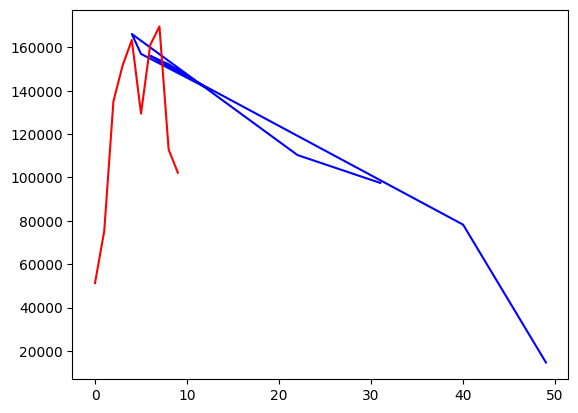

In [22]:
import matplotlib.pyplot as plt

plt.plot(y_one_test, color='blue')
plt.plot(y_pred_reg, color='red')
plt.show()

### **Multiple Linear Regression**

In [23]:
# feature encoding for state
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [29]:
X = df_dummies.drop('Profit', axis=1)
y = df_dummies['Profit']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred_reg2 = reg2.predict(X_test)

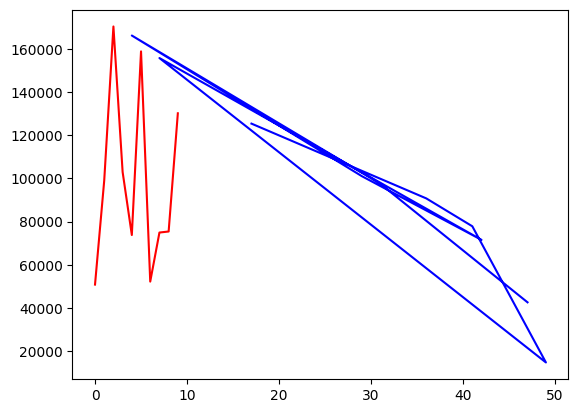

In [35]:
plt.plot(y_test, color='blue')
plt.plot(y_pred_reg2, color='red')
plt.show()